In [1]:
pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=4e3839289525e925827945ab7528830d1c3c11d530d743cab9effccd7b85bfc3
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [2]:
import face_recognition
from PIL import Image, ImageDraw

In [23]:
# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture_1 and learn how to recognize it.
Amitabh_bachan_image = face_recognition.load_image_file("amitabh bachan.jpg")
Amitabh_bachan_face_encoding = face_recognition.face_encodings(Amitabh_bachan_image)[0]

# Load a second sample picture_2 and learn how to recognize it.
SRK_image = face_recognition.load_image_file("Shah_Rukh_Khan.jpg")
SRK_face_encoding = face_recognition.face_encodings(SRK_image)[0]

# Load a sample picture_3 and learn how to recognize it.
priyanka_chopra_image = face_recognition.load_image_file("priyanka-chopra.jpg")
priyanka_chopra_face_encoding = face_recognition.face_encodings(priyanka_chopra_image)[0]

# Load a sample picture_4 and learn how to recognize it.
Ranveer_Singh_image = face_recognition.load_image_file("ranveer-singh.jpg")
Ranveer_Singh_face_encoding = face_recognition.face_encodings(Ranveer_Singh_image)[0]

# Load a second sample picture_5 and learn how to recognize it.
jenna_image = face_recognition.load_image_file("Jenna_Ortega.jpg")
jenna_face_encoding = face_recognition.face_encodings(jenna_image)[0]

# Load a sample picture_6 and learn how to recognize it.
Timothee_Chalamet_image = face_recognition.load_image_file("Timothée_Chalamet.jpg")
Timothee_Chalamet_face_encoding = face_recognition.face_encodings(Timothee_Chalamet_image)[0]

# Load a sample picture_7 and learn how to recognize it.
Tom_Holland_image = face_recognition.load_image_file("Tom_Holland.jpg")
Tom_Holland_face_encoding = face_recognition.face_encodings(Tom_Holland_image)[0]

# Load a sample picture_8 and learn how to recognize it.
Alia_Bhatt_image = face_recognition.load_image_file("Alia_Bhatt.jpg")
Alia_Bhatt_face_encoding = face_recognition.face_encodings(Alia_Bhatt_image)[0]

# Load a second sample picture_8 and learn how to recognize it.
Ranbir_Kapoor_image = face_recognition.load_image_file("Ranbir_kapoor.jpg")
Ranbir_Kapoor_face_encoding = face_recognition.face_encodings(Ranbir_Kapoor_image)[0]

# Load a sample picture_9 and learn how to recognize it.
Aamir_Khan_image = face_recognition.load_image_file("Amir_Khan.jpg")
Aamir_Khan_face_encoding = face_recognition.face_encodings(Aamir_Khan_image)[0]




# Create arrays of known face encodings and their names
known_face_encodings = [
    Amitabh_bachan_face_encoding,
    SRK_face_encoding,
    priyanka_chopra_face_encoding,
    Ranveer_Singh_face_encoding,
    jenna_face_encoding,
    Timothee_Chalamet_face_encoding,
    Tom_Holland_face_encoding,
    Alia_Bhatt_face_encoding,
    Ranbir_Kapoor_face_encoding,
    Aamir_Khan_face_encoding

]

known_face_names = [
    "Amitabh Bachan",
    "Shah Rukh Khan",
    "Priyanka Chopra",
    "Ranveer Singh",
    "Jenna Ortega",
    "Timothee Chalamet",
    "Tom Holland",
    "Alia Bhatt",
    "Ranbir Kapoor",
    "Aamir Khan"
]

In [24]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("merged_pic.png")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
pil_image.show()

# You can also save a copy of the new image to disk if you want by uncommenting this line
pil_image.save("image_with_boxes.jpg")

In [35]:
image_display = Image.open("image_with_boxes.jpg")


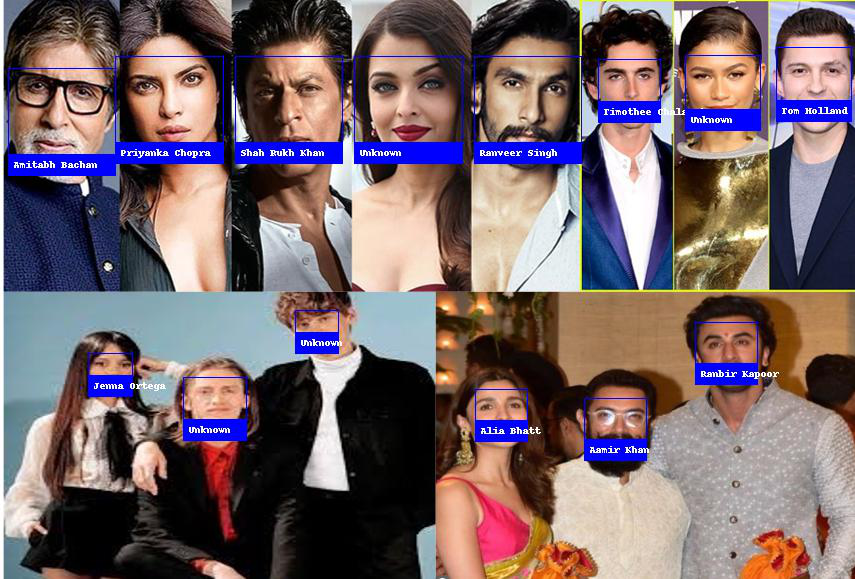

In [36]:
image_display